<a href="https://colab.research.google.com/github/pwirap/Predict_Clicked_Ads_Customer_Classification_by_Using_Machine_Learning/blob/main/PHILIPUS_Predict_Clicked_Ads_Customer_Classification_by_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : PHILIPUS DIMA WIRA PRATOMO

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy import stats

from datetime import datetime

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

## Load and Data Understanding

In [ ]:
df = pd.read_csv("Clicked Ads Dataset.csv")

In [ ]:
pd.set_option('display.max_columns', None)
df.sample(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
699,699,73.88,29,441768180.0,233.61,Perempuan,1/4/2016 6:37,No,Bandung,Jawa Barat,Fashion
434,434,83.55,39,460714660.0,221.18,Laki-Laki,6/8/2016 20:13,No,Bandar Lampung,Lampung,Otomotif
241,241,53.68,47,393266510.0,115.26,Laki-Laki,2/16/2016 9:11,Yes,Bandung,Jawa Barat,Fashion
99,99,79.71,34,486197810.0,NaN,Laki-Laki,7/2/2016 14:57,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Electronic
833,833,45.99,33,358141980.0,124.61,Laki-Laki,2/27/2016 15:04,Yes,Depok,Jawa Barat,Health
753,753,82.72,31,459933530.0,179.82,Perempuan,1/17/2016 5:07,No,Surakarta,Jawa Tengah,Health
921,921,55.71,37,NaN,112.52,Laki-Laki,3/6/2016 23:26,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Travel
449,449,77.69,22,341968060.0,169.88,Laki-Laki,6/21/2016 14:32,No,Batam,Kepulauan Riau,House
804,804,53.92,41,180173630.0,125.46,Laki-Laki,6/12/2016 11:17,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Bank
690,690,87.16,33,425641510.0,197.15,Perempuan,2/11/2016 11:50,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Food


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


1. The dataset has 1000 records and 10 features
2. Timestamp feature can be changed to date
3. The name of the male column can be changed to gender

**Checking for Null Values**

In [ ]:
misval1 = df.isnull().sum()
print(misval1.sort_values(ascending=False))

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
Unnamed: 0                   0
Age                          0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64


There is some Null Values:
1. Daily Time Spent on Site    13
2. Area Income                 13
3. Daily Internet Usage        11
4. Male                         3

**Checking for Data Duplicates**

In [ ]:
df.duplicated().sum()

NameError: ignored

there are no duplicate data

Summary
1. The dataset has 1000 records and 10 features
2. Timestamp feature can be changed to date
3. The name of the male column can be changed to gender
4. There is some Null Values in Daily Time Spent on Site,Area Income,Daily Internet Usage,Male
5. there are no duplicate data

## HANDLING TYPE DATA AND COLUMN NAME

**Handling Type Data**

In [ ]:
data_datypes = df.copy()

In [ ]:
data_datypes['Timestamp'] = pd.to_datetime(data_datypes['Timestamp'])

**Handling Column Name**

In [ ]:
df_change_name = data_datypes.copy()

In [ ]:
df_change_name.rename(columns={'Male': 'Gender'}, inplace=True)

## EDA

In [ ]:
df_eda = df_change_name.copy()

**Descriptive Statistics**

In [ ]:
num = df_eda.select_dtypes(include=[np.number])
cat = df_eda.select_dtypes(include=[np.object])

<ipython-input-12-312858dc6f92>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = df_eda.select_dtypes(include=[np.object])


In [ ]:
cat.describe()

,Gender,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [ ]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [ ]:
for col in df_eda:
    unique_values = df_eda[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: Unnamed: 0
Unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 

Summary
1. The contents of all columns are reasonable
2. The maximum/minimum value is not too far from the mean/median
3. The mean and median are not too far apart
4. The contents of each unique value are reasonable

**Univariate Analysis**

Numerical

In [ ]:
num = df_eda.select_dtypes(include=[np.number])
cat = df_eda.select_dtypes(include=[np.object])

<ipython-input-16-312858dc6f92>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = df_eda.select_dtypes(include=[np.object])


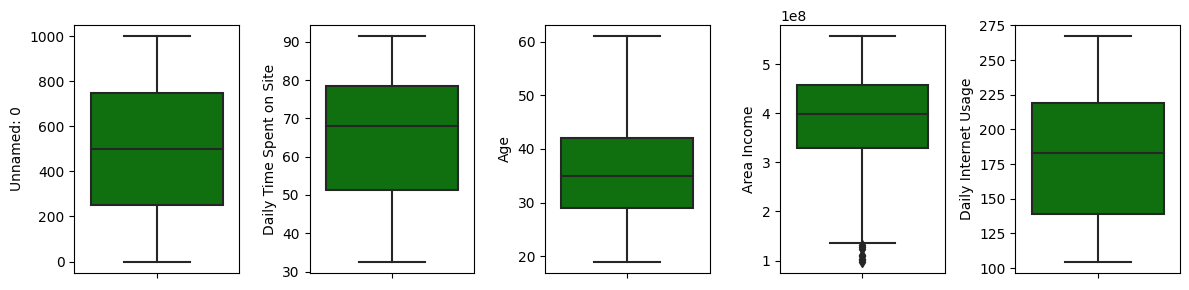

In [ ]:
num_list = list(num)
plt.figure(figsize=(12, 3))
for i in range(0, len(num_list)):
    plt.subplot(int(len(num_list)/4), 5, i+1)
    sns.boxplot(y=df_eda[num_list[i]],color='green',orient='v')
    plt.tight_layout()

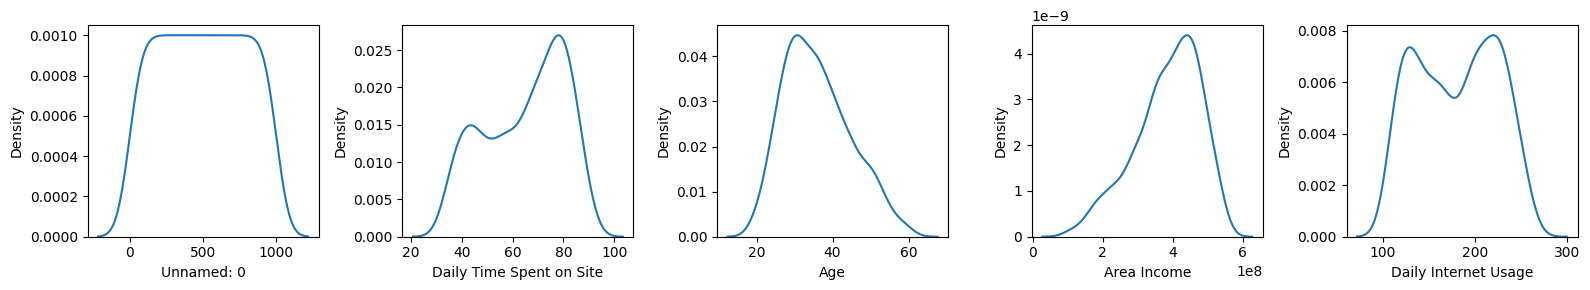

In [ ]:
num_list = list(num)
plt.figure(figsize=(16, 3))
for i in range(0, len(num_list)):
    plt.subplot(int(len(num_list)/4), 5, i+1)
    sns.kdeplot(x=df[num_list[i]])
    plt.xlabel(num_list[i])
    plt.tight_layout()

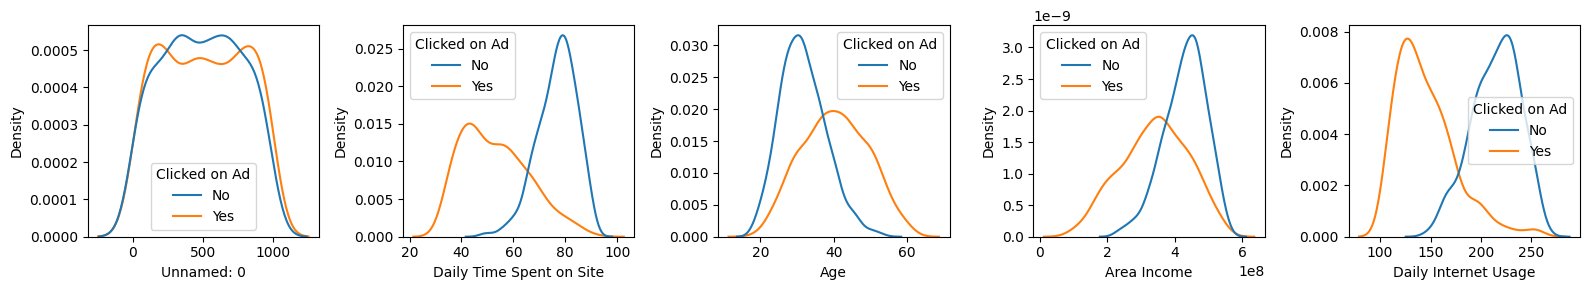

In [ ]:
num_list = list(num)
plt.figure(figsize=(16, 3))
for i in range(0, len(num_list)):
    plt.subplot(int(len(num_list)/4), 5, i+1)
    sns.kdeplot(x=df_eda[num_list[i]],hue=df_eda['Clicked on Ad'])
    plt.xlabel(num_list[i])
    plt.tight_layout()

Summary :
1. There are outliers in the income feature area
2. Feature Area Income distribution is slightly Negative Skew
3. The Daily Time Spent distribution feature includes bimodal distribution
3. Feature Age distribution is slightly positive Skew
4. The daily internet usage feature has a normal distribution
5. Characteristics of customers who click on ads
- Daily Time Spent on site = 40 - 60
- Age = 35 - 50
- Area Income = 3 - 4
- Daily Internet Usage = 120 - 150
6. Characteristics of customers who **don't** click on ads
- Daily Time Spent on site = 75 - 85
- Age = 25 - 35
- Area Income = 4 - 5
- Daily Internet Usage = 220 - 240

7. Customers who click on ads tend to spend more daily time on site than those who don't click on ads
8. Customers who click on ads tend to be older than those who don't click on ads
9. Customers who click on ads tend to have a lower income area than those who don't click on ads
10. Customers who click on ads tend to have lower daily internet usage than those who don't click on ads

Categorical

In [ ]:
df_group = df_eda.groupby('Gender').size().reset_index(name='Total')
df_group['Proportion'] = df_group['Total'] / df_group['Total'].sum()
df_group

,Gender,Total,Proportion
0,Laki-Laki,479,0.480441
1,Perempuan,518,0.519559


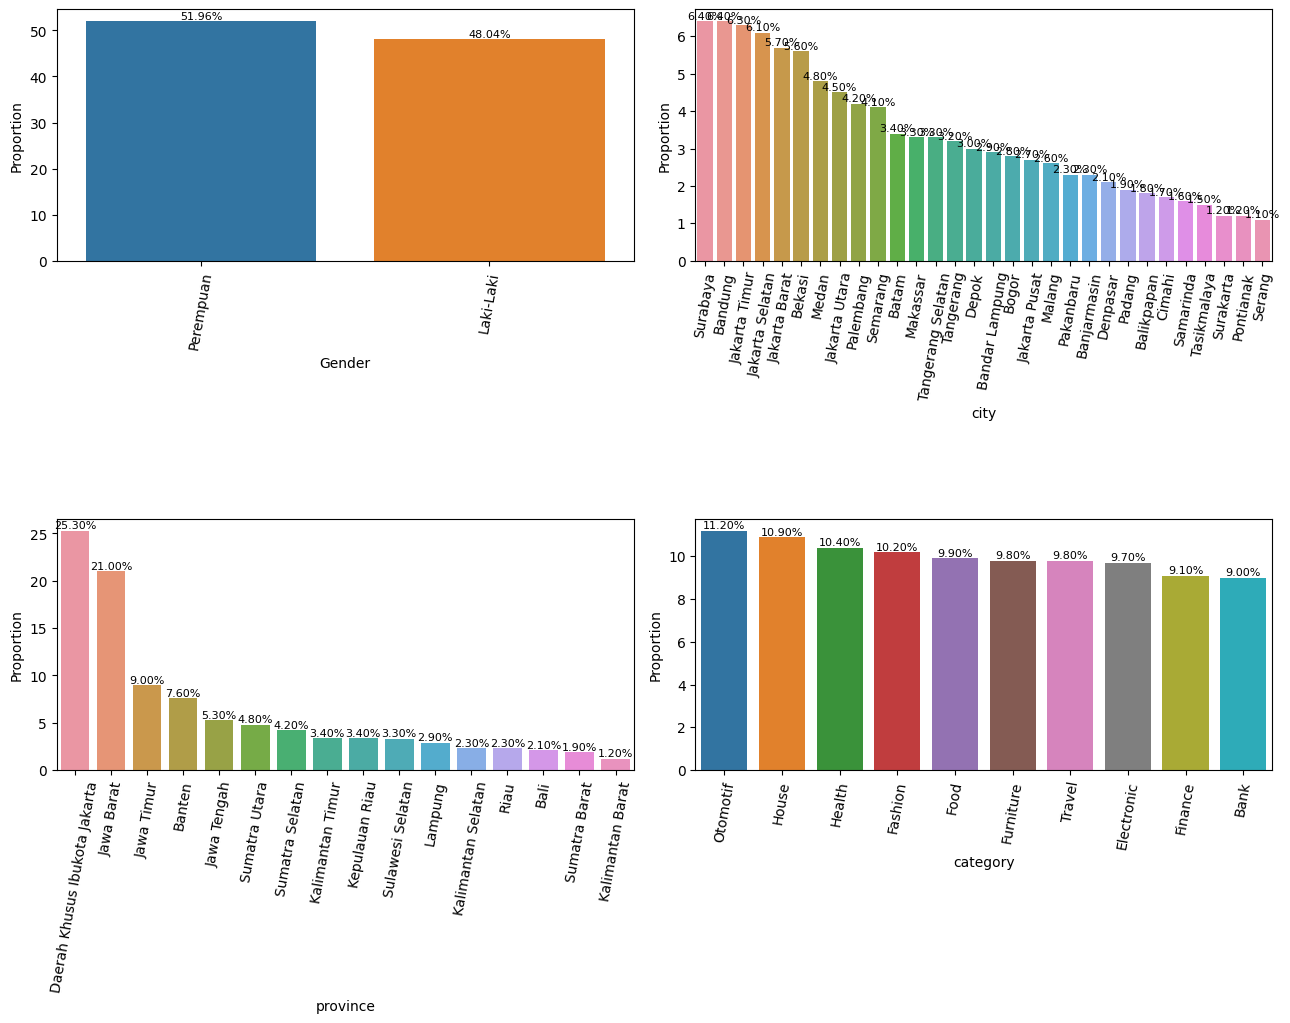

In [ ]:
cat_new = cat.drop(columns=['Clicked on Ad'])
cat_list = list(cat_new)
plt.figure(figsize=(13,13))
for i in range(0, len(cat_list)):
    plt.subplot(3, 2, i+1)
    df_group = df_eda.groupby(cat_list[i]).size().reset_index(name='Total')
    df_group['Proportion'] = round((df_group['Total'] / df_group['Total'].sum())*100,2)
    df_group_sorted = df_group.sort_values(by='Proportion', ascending=False)
    ax = sns.barplot(data=df_group_sorted, x=cat_list[i], y='Proportion')
    plt.xlabel(cat_list[i],fontsize=10)
    plt.ylabel("Proportion",fontsize=10)
    plt.xticks(rotation=80, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    for p in ax.patches:
      height = p.get_height()
      ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black')

Summary :
1. There are more women than men, although not much different
2. The largest province is DKI Jakarta
3. Automotive is the highest category, but not much different from other categories
4. The largest cities are Surabaya and Bandung

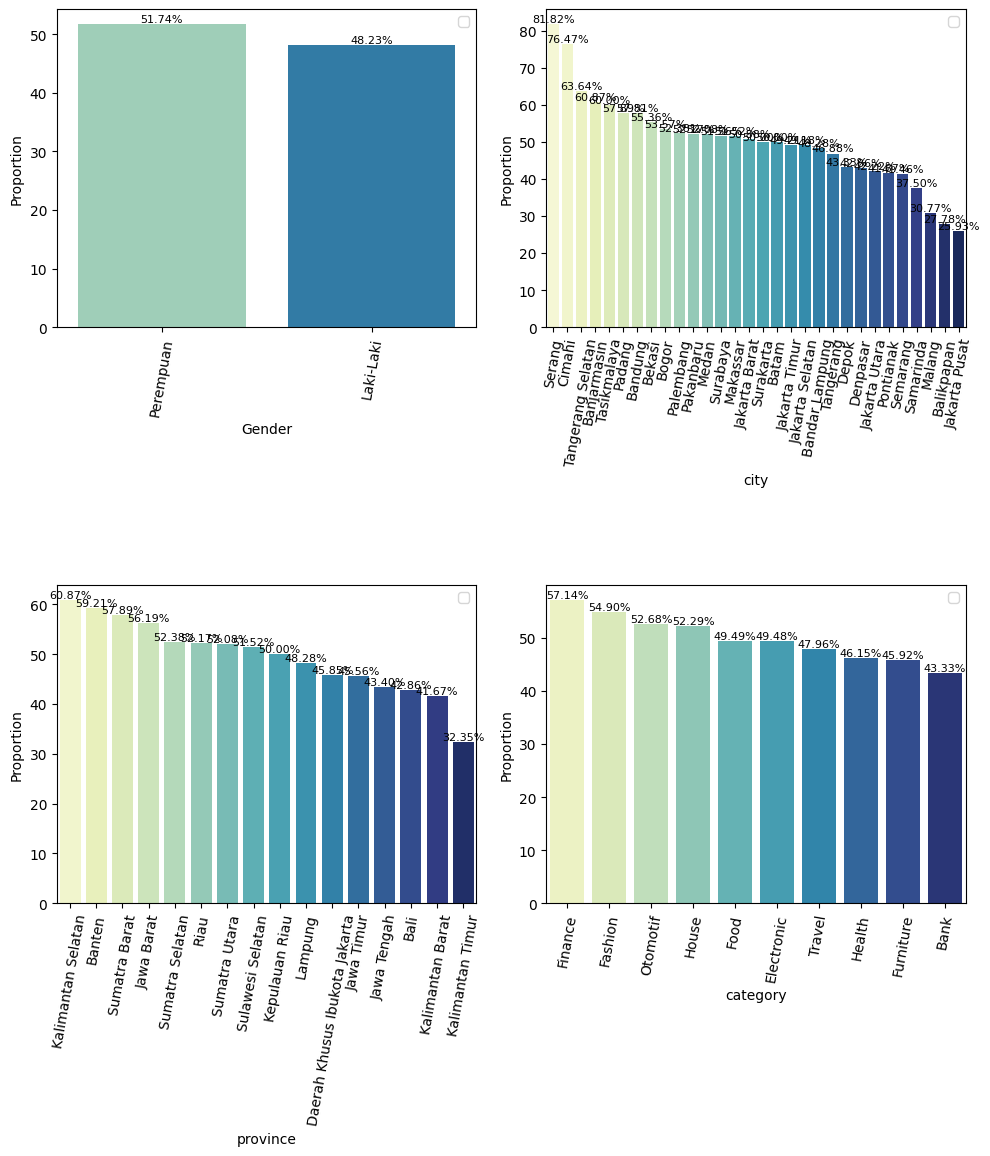

In [ ]:
cat_new = cat.drop(columns=['Clicked on Ad'])
cat_list = list(cat_new)
plt.figure(figsize=(10,15))
for i in range(0, len(cat_list)):
    plt.subplot(3, 2, i+1)
    df_group = df_eda.groupby(cat_list[i]).size().reset_index(name='Total')
    df_group1=df_eda.groupby([cat_list[i],df_eda['Clicked on Ad']]).size().reset_index(name='Jumlah')
    df_gab = df_group1.merge(df_group, on=cat_list[i], how='left')
    df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)
    df_gab = df_gab[df_gab["Clicked on Ad"] == "Yes"]
    df_gab = df_gab.sort_values(by='Rasio', ascending=False)
    ax = sns.barplot(data=df_gab, x=cat_list[i], y='Rasio', palette='YlGnBu')
    plt.xlabel(cat_list[i],fontsize=10)
    plt.ylabel("Proportion",fontsize=10)
    plt.xticks(rotation=80, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    for p in ax.patches:
      height = p.get_height()
      ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black')

    plt.legend(fontsize=10)

Summary :
1. If grouped by gender, women click more on Ads than men
2. If grouped by city, some cities such as Cimahi and Serang tend to click on ads compared to other cities
3. If grouped by province, South Kalimantan and Banten tend to click on ads compared to other provinces
4. If grouped by category, Finance and Fashion tend to click on ads compared to other categories

**Bivariate Analysis**

Numerical

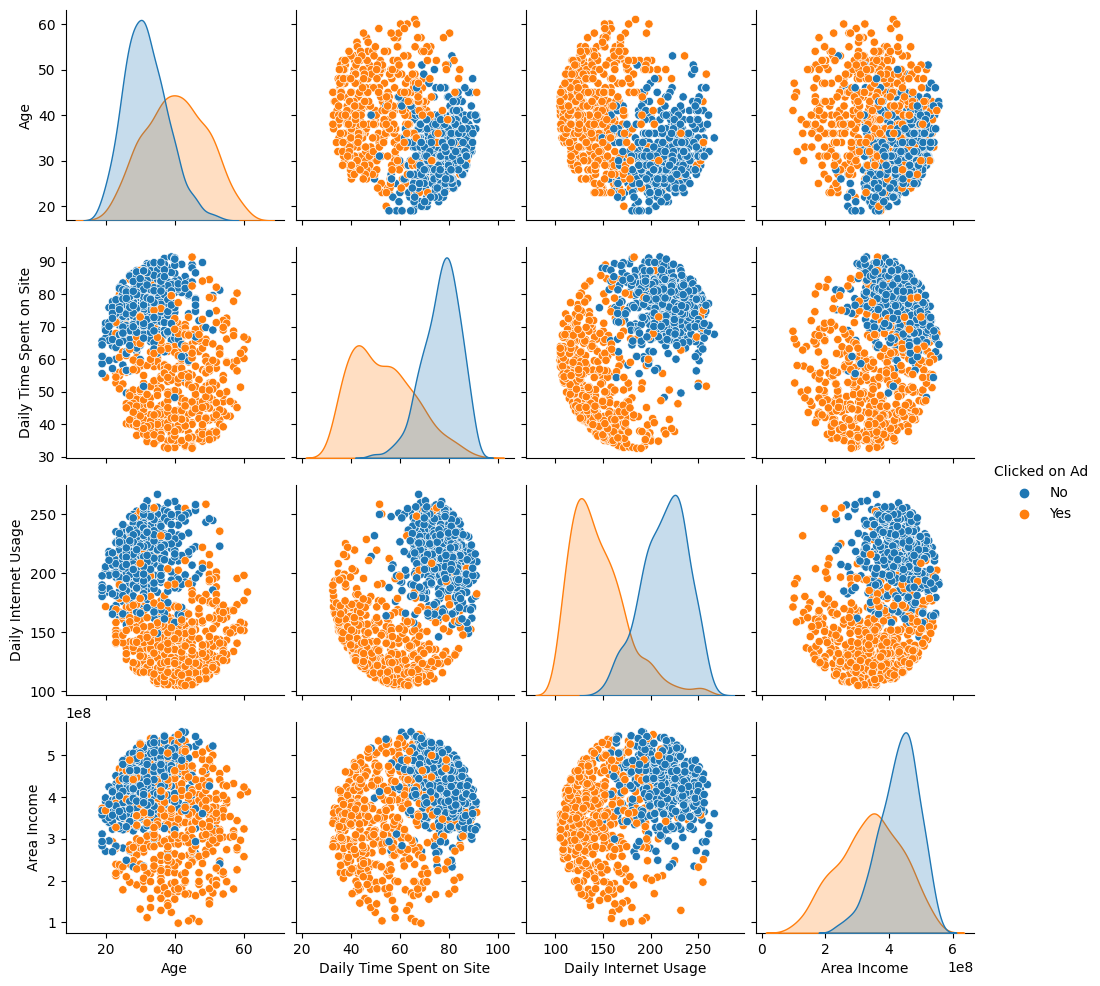

In [ ]:
sns.pairplot(df_eda[['Age','Daily Time Spent on Site','Daily Internet Usage','Area Income','Clicked on Ad']],hue='Clicked on Ad')

Summary :
1. Customers who click on ads tend to be more mature with daily time spent on the site, daily internet usage, and low area income
2. It can be concluded that the longer the customer, the lower the daily time spent on the site, daily internet usage and area income, and vice versa.

## Multivariate Analysis

In [ ]:
df_multiva = df_eda.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df_multiva['Gender'] = label.fit_transform(df_multiva['Gender'])
df_multiva['Clicked on Ad'] = label.fit_transform(df_multiva['Clicked on Ad'])
df_multiva['city'] = label.fit_transform(df_multiva['city'])
df_multiva['province'] = label.fit_transform(df_multiva['province'])
df_multiva['category'] = label.fit_transform(df_multiva['category'])

<ipython-input-26-8acfafe7bff5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_multiva.corr()


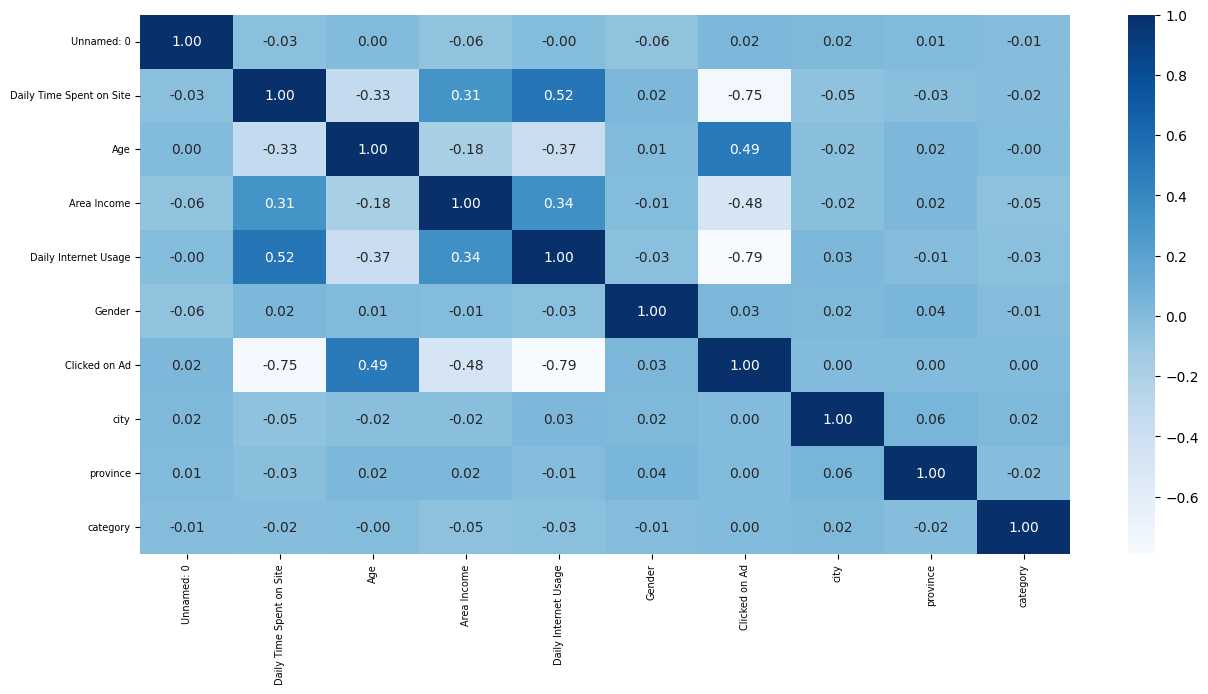

In [ ]:
correlation_matrix = df_multiva.corr()
plt.figure(figsize=(15, 7))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), size=7)
ax.set_yticklabels(ax.get_yticklabels(), size=7)
ax.xaxis.tick_bottom()

Summary :
1. There are 4 features that have a high correlation with the target
2. Age is negatively correlated with Daily Time Spent, Area Income and Daily Internet Usage. However, it has a positive correlation with the target (Clicked on Ad)
3. Are Income is positively correlated with Daily Time Spent and Daily Internet Usage. However, it has a negative correlation with the target (Clicked on Ad)
4. Daily Internet Usage is positively correlated with Daily Time on Site. However, it has a negative correlation with the target (Clicked on Ad)
5. Daily Time on Site has a negative correlation with the target (Clicked on Ad)

## Data Cleaning & Data Preprocessing

Handling Missing Value

Handling missing values ​​will be carried out on features:
1. Daily Time Spent on Site, filled in with the median
2. Area Income, fill in the median
3. Daily Internet Usage, fill in the median
4. Gender, filled in with mode

In [ ]:
df_datapro = df_eda.copy()

In [ ]:
df_datapro['Daily Time Spent on Site'] = df_datapro['Daily Time Spent on Site'].fillna(df_datapro['Daily Time Spent on Site'].median())
df_datapro['Area Income'] = df_datapro['Area Income'].fillna(df_datapro['Area Income'].median())
df_datapro['Daily Internet Usage'] = df_datapro['Daily Internet Usage'].fillna(df_datapro['Daily Internet Usage'].median())
df_datapro['Gender'] = df_datapro['Gender'].fillna(df_datapro['Gender'].mode()[0])

In [ ]:
df_datapro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Gender                    1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 86.1+ KB


Feature Engineering

Create a new feature from timestamp to year, month, week and day

In [ ]:
df_datapro['Year'] = df_datapro['Timestamp'].dt.year
df_datapro['Month'] = df_datapro['Timestamp'].dt.month
df_datapro['Week'] = df_datapro['Timestamp'].dt.isocalendar().week
df_datapro['Day'] = df_datapro['Timestamp'].dt.day

In [ ]:
df_datapro["Week"] = df_datapro["Week"].astype('int64')

One Hot Encoding

Perform One-Hot Encoding for the "Gender" feature and replace "1" with "Yes" and "0" with "No" in the "Clicked on Ad" feature.

In [ ]:
df_datapro = pd.get_dummies(df_datapro, columns = ['Gender'])

In [ ]:
df_datapro['Clicked on Ad'] = df_datapro['Clicked on Ad'].replace({'Yes': 1, 'No': 0})

Delete the following features: "Unnamed Features: 0" since it doesn't provide any information, "year" as it contains only one unique value, "Timestamp" because feature engineering has already been performed, and "city," "province," and "category" due to the high number of unique values which would lead to the curse of dimensionality when one-hot encoding is applied.

In [ ]:
df_datapro = df_datapro.drop(["Unnamed: 0","Year","Timestamp","city","province","category"],axis=1)

## Modelling

The metric chosen for evaluation is Recall, which aims to maximize the number of customers who actually click on the ad so that the efficiency of providing advertising becomes more effective.

Split Feature and Target



In [ ]:
df_split = df_datapro.copy()

In [ ]:
X = df_split.drop(columns=['Clicked on Ad'])
y = df_split['Clicked on Ad']

Split Data Train dan Data Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Handling Outlier

Outliers will be removed in the Income Area in Data Train

In [ ]:
model_data_train = pd.concat([X_train, y_train], axis = 1)

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(model_data_train)}')

z_scores = stats.zscore(model_data_train['Area Income'])
threshold = 3
model_data_train = model_data_train[(z_scores < threshold) & (z_scores > -threshold)]

print('Jumlah baris setelah memfilter outlier', len(model_data_train))

Jumlah baris sebelum memfilter outlier: 700
Jumlah baris setelah memfilter outlier 699


In [ ]:
X_train = model_data_train.drop(columns=['Clicked on Ad'])
y_train = model_data_train['Clicked on Ad']

Class Imbalanced

Checking for Class imbalanced in Data Train and Data Test

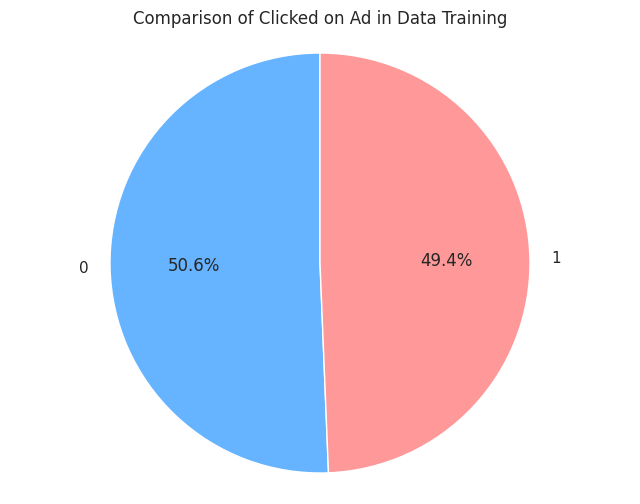

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df_checkimbalance_train = y_train.value_counts()
labels = df_checkimbalance_train.index
plt.pie(df_checkimbalance_train, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Comparison of Clicked on Ad in Data Training")
plt.axis('equal')
plt.show()

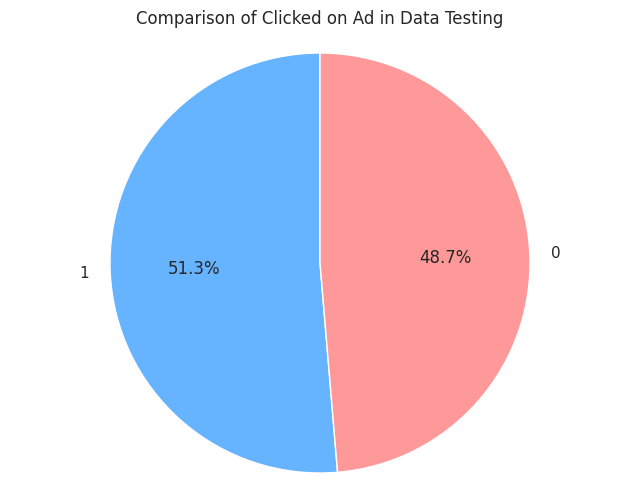

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df_checkimbalance_test = y_test.value_counts()
labels = df_checkimbalance_test.index
plt.pie(df_checkimbalance_test, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Comparison of Clicked on Ad in Data Testing")
plt.axis('equal')
plt.show()

Data Training and Data Test has Class Balanced

In [ ]:
X1_train = X_train.copy()
y1_train = y_train.copy()
X1_test = X_test.copy()
y1_test = y_test.copy()
X2_train = X_train.copy()
y2_train = y_train.copy()
X2_test = X_test.copy()
y2_test = y_test.copy()

## Experiment 1: Modeling without Normalization/Standardization

In [ ]:
#Perhatikan Models yang digunakan
#Perhatikan cv yang digunakan
#Karena Fokus di Recall, maka cv hanya perhitungkan Train dan Test di Recall

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix

def evaluate_models(X_train, y_train, X_test, y_test):
    results = []

    # List of models to evaluate
    models = [
        ("Gradient Boosting", GradientBoostingClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Decision Trees", DecisionTreeClassifier()),
        ("SVM", SVC(probability=True)),
        ("KNN", KNeighborsClassifier(n_neighbors=5)),
        ("XGBoost", xgb.XGBClassifier(objective="binary:logistic"))
    ]

    for model_name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)


        cf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,6))
        sns.set(font_scale = 1.5)
        ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
        plt.title('Confusion Matrix ' + model_name,fontsize=12)
        ax.set_xlabel('Predicted Values',fontsize=10)
        ax.set_ylabel('Actual Values',fontsize=10)
        plt.show()

        accuracy_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
        accuracy_test = round(accuracy_score(y_test, y_pred) * 100, 2)
        precision_train = round(precision_score(y_train, y_train_pred) * 100, 2)
        precision_test = round(precision_score(y_test, y_pred) * 100, 2)
        recall_train = round(recall_score(y_train, y_train_pred) * 100, 2)
        recall_test = round(recall_score(y_test, y_pred) * 100, 2)
        f1score_train = round(f1_score(y_train, y_train_pred) * 100, 2)
        f1score_test = round(f1_score(y_test, y_pred) * 100, 2)
        rocauc_train = round(roc_auc_score(y_train, y_train_pred) * 100, 2)
        rocauc_test = round(roc_auc_score(y_test, y_pred) * 100, 2)

        cv_scores = cross_validate(model, X_train, y_train, cv=5,
                                    scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                                    return_train_score=True)

        mean_cv_accuracy = round(cv_scores['test_accuracy'].mean() * 100, 2)
        mean_cv_precision = round(cv_scores['test_precision'].mean() * 100, 2)
        mean_cv_recall_test = round(cv_scores['test_recall'].mean() * 100, 2)
        mean_cv_recall_train = round(cv_scores['train_recall'].mean() * 100, 2)
        mean_cv_f1 = round(cv_scores['test_f1'].mean() * 100, 2)
        mean_cv_roc_auc = round(cv_scores['test_roc_auc'].mean() * 100, 2)

        results.append([model_name, accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1score_train, f1score_test,
                        rocauc_train, rocauc_test, mean_cv_accuracy, mean_cv_precision, mean_cv_recall_test, mean_cv_recall_train, mean_cv_f1, mean_cv_roc_auc])

    results_df = pd.DataFrame(results, columns=["Model", "Accuracy Train (%)", "Accuracy Test (%)", "Precision Train (%)", "Precision Test (%)", "Recall Train (%)", "Recall Test (%)",
                                                 "F1 Score Train (%)", "F1 Score Test (%)", "ROC AUC Train (%)", "ROC AUC Test (%)", "CV Accuracy (%)", "CV Precision (%)", "CV Recall Test(%)" ,"CV Recall Train(%)", "CV F1 Score (%)", "CV ROC AUC (%)"])
    return results_df

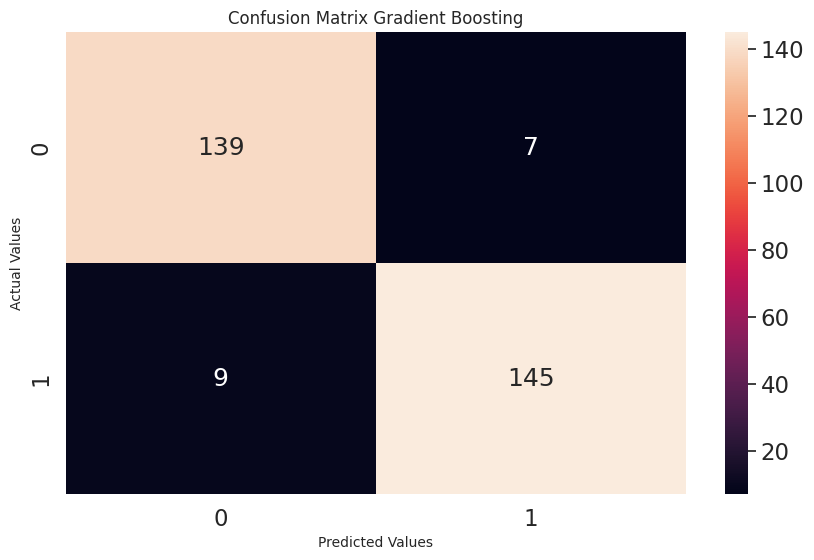

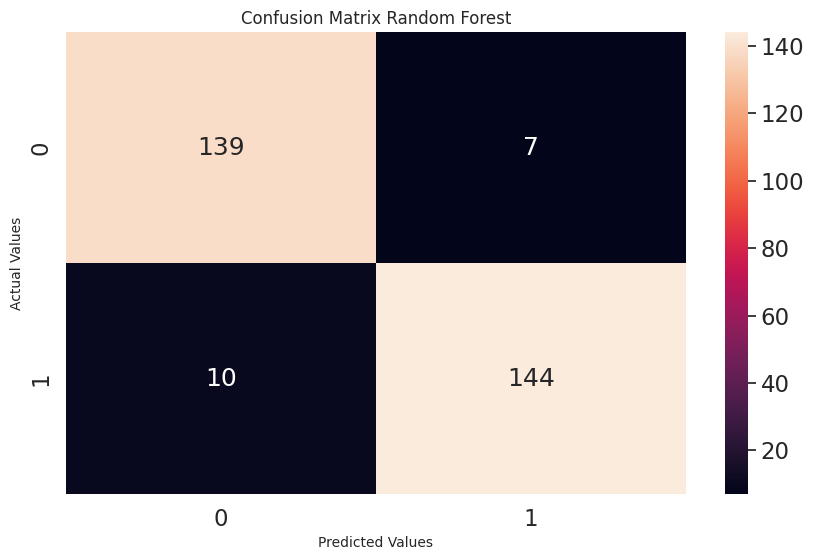

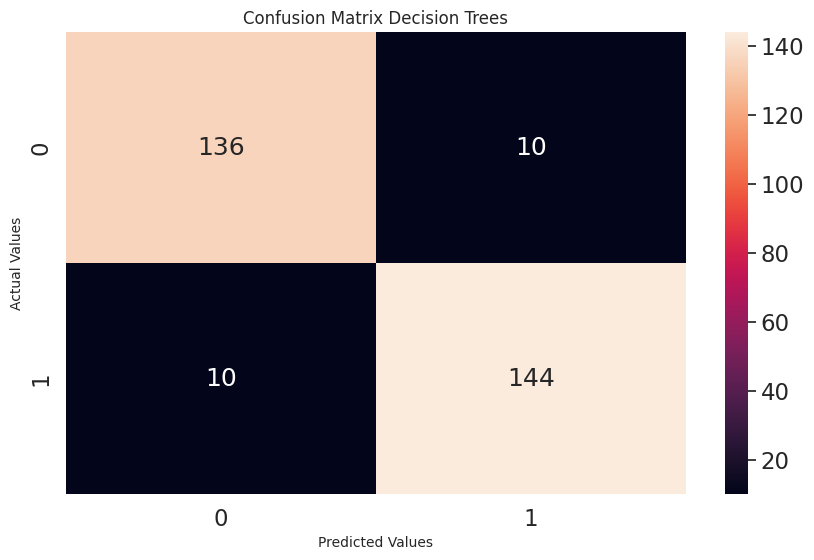

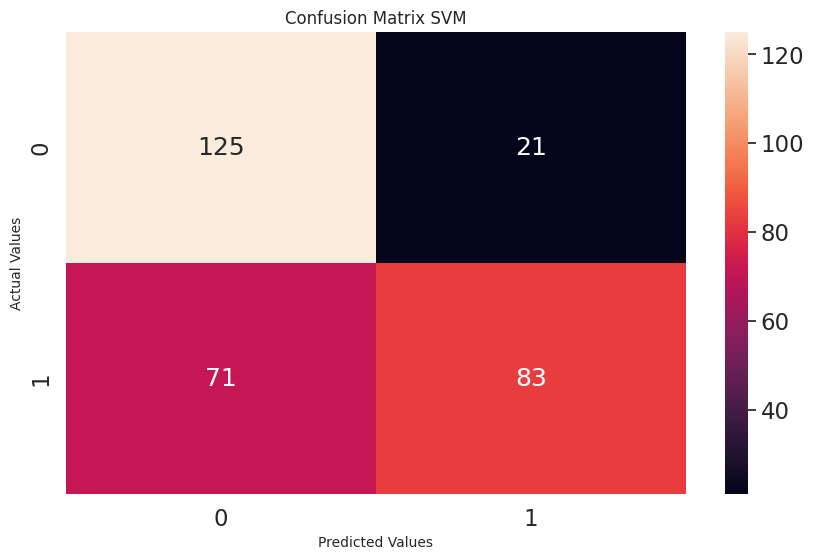

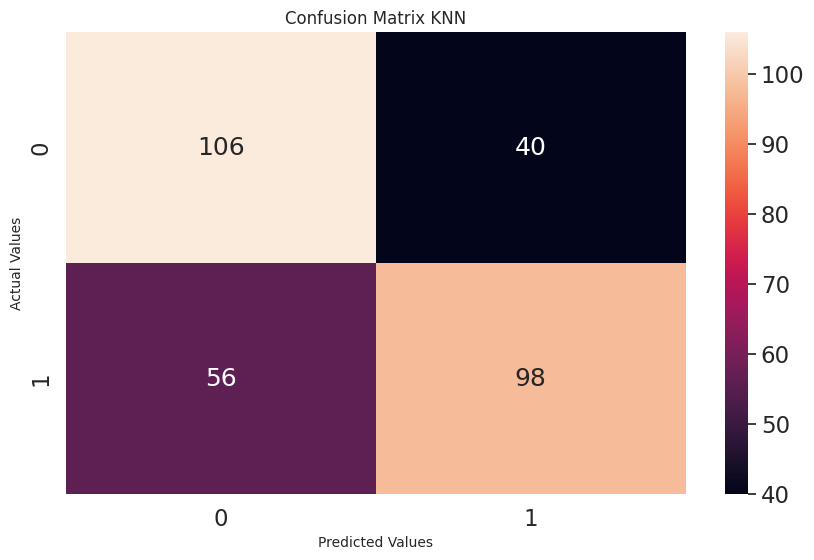

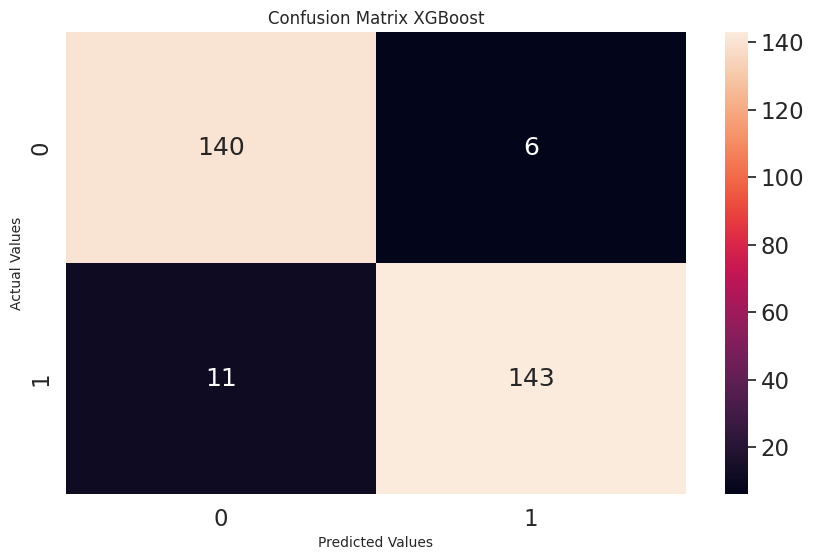

,Model,Accuracy Train (%),Accuracy Test (%),Precision Train (%),Precision Test (%),Recall Train (%),Recall Test (%),F1 Score Train (%),F1 Score Test (%),ROC AUC Train (%),ROC AUC Test (%),CV Accuracy (%),CV Precision (%),CV Recall Test(%),CV Recall Train(%),CV F1 Score (%),CV ROC AUC (%)
0,Gradient Boosting,100.00,94.67,100.00,95.39,100.00,94.16,100.00,94.77,100.00,94.68,96.14,96.81,95.36,100.00,96.06,98.73
1,Random Forest,100.00,94.33,100.00,95.36,100.00,93.51,100.00,94.43,100.00,94.36,96.57,97.35,95.65,100.00,96.48,99.00
2,Decision Trees,100.00,93.33,100.00,93.51,100.00,93.51,100.00,93.51,100.00,93.33,93.13,93.14,93.04,100.00,93.06,93.13
3,SVM,72.39,69.33,80.16,79.81,58.55,53.90,67.67,64.34,72.21,69.76,72.25,79.18,59.42,59.49,67.87,78.54
4,KNN,77.97,68.00,79.38,71.01,74.78,63.64,77.01,67.12,77.93,68.12,66.67,67.01,63.48,74.42,65.15,72.44
5,XGBoost,100.00,94.33,100.00,95.97,100.00,92.86,100.00,94.39,100.00,94.37,95.57,96.50,94.49,100.00,95.45,98.81


In [ ]:
result = evaluate_models(X1_train, y1_train, X1_test, y1_test)
result

## Experiment 2: Modeling with Normalization/Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss_feature = X2_train[['Daily Time Spent on Site','Daily Internet Usage','Area Income','Age']]

for n in ss_feature:
  scaler = ss.fit(X2_train[[n]])
  X2_train[n] = scaler.transform(X2_train[[n]])
  X2_test[n] = scaler.transform(X2_test[[n]])

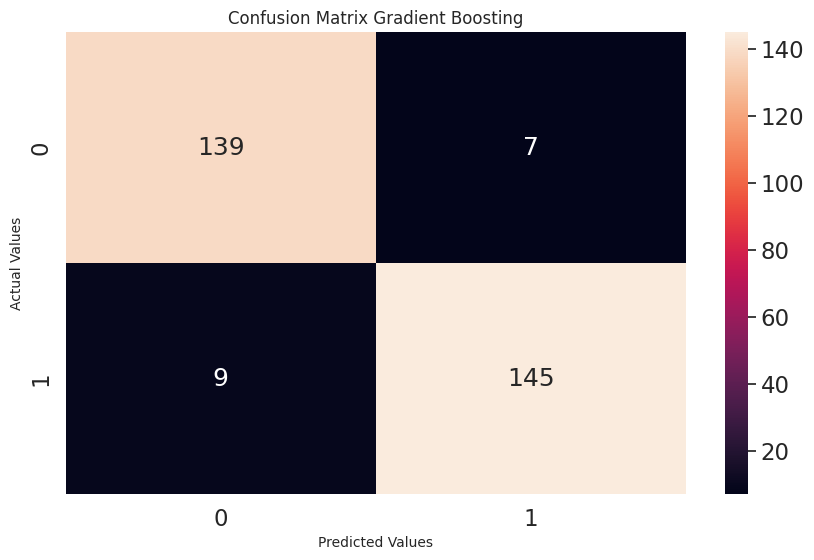

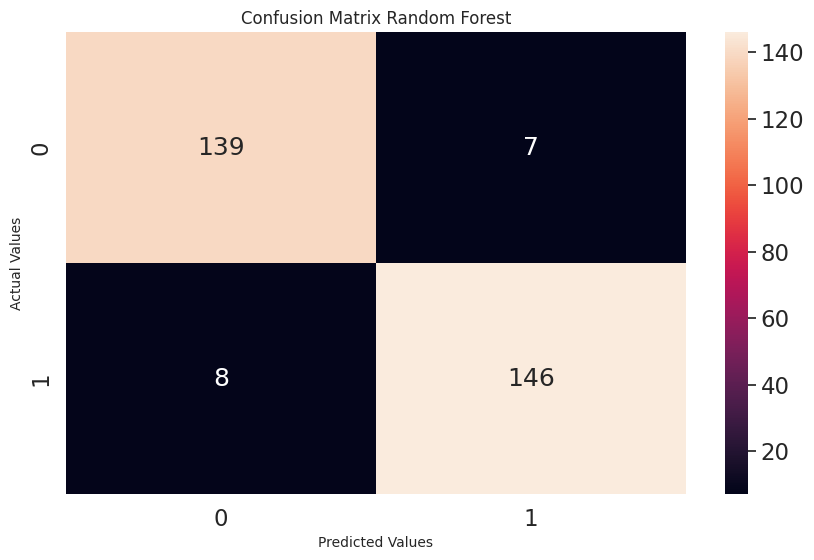

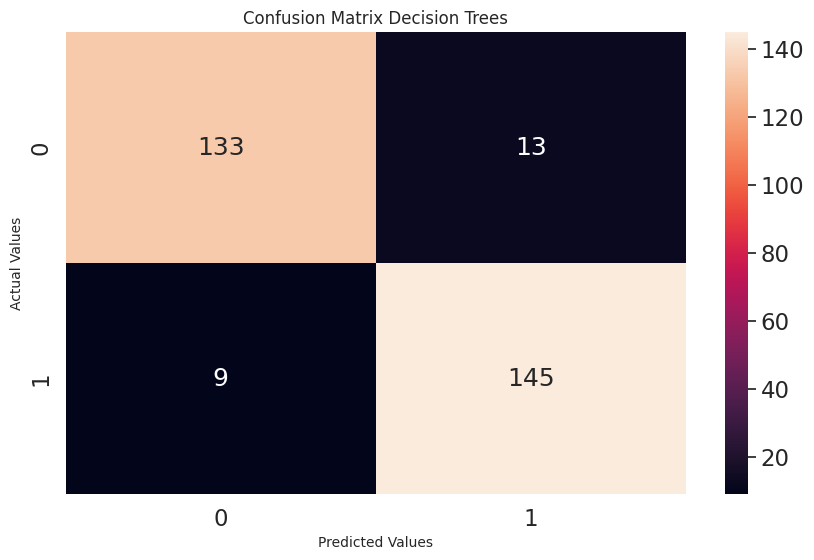

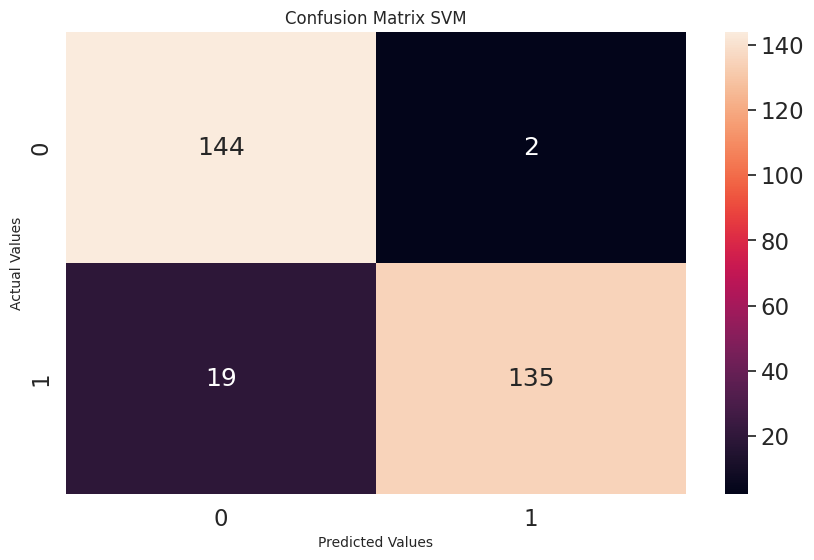

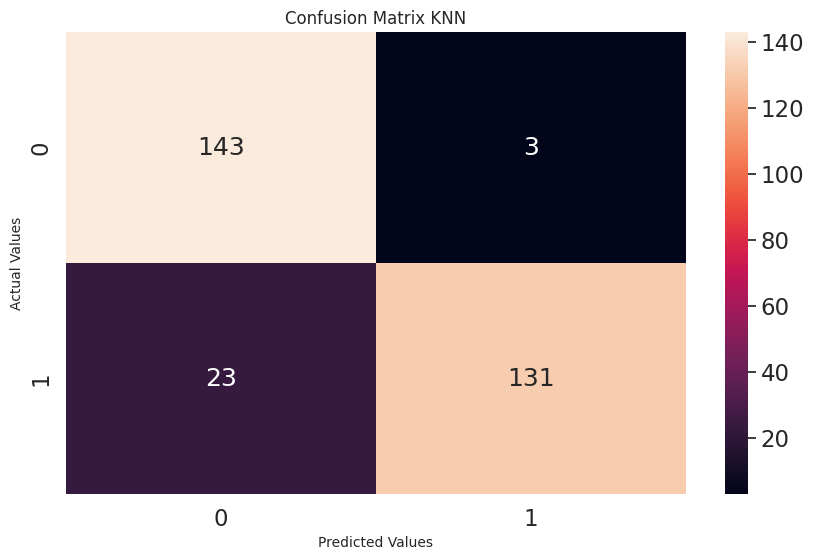

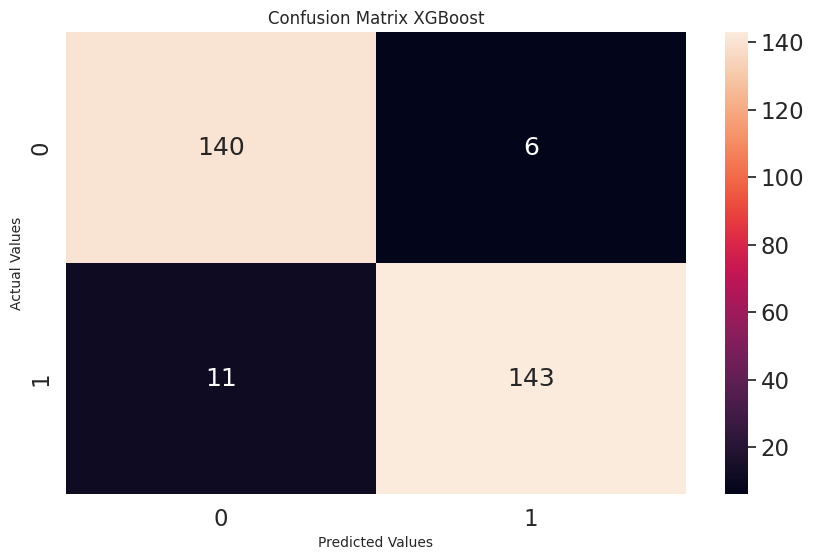

,Model,Accuracy Train (%),Accuracy Test (%),Precision Train (%),Precision Test (%),Recall Train (%),Recall Test (%),F1 Score Train (%),F1 Score Test (%),ROC AUC Train (%),ROC AUC Test (%),CV Accuracy (%),CV Precision (%),CV Recall Test(%),CV Recall Train(%),CV F1 Score (%),CV ROC AUC (%)
0,Gradient Boosting,100.00,94.67,100.00,95.39,100.00,94.16,100.00,94.77,100.00,94.68,96.14,96.81,95.36,100.00,96.06,98.75
1,Random Forest,100.00,95.00,100.00,95.42,100.00,94.81,100.00,95.11,100.00,95.01,96.42,97.08,95.65,100.00,96.35,99.11
2,Decision Trees,100.00,92.67,100.00,91.77,100.00,94.16,100.00,92.95,100.00,92.63,93.13,93.15,93.04,100.00,93.05,93.13
3,SVM,95.14,93.00,99.68,98.54,90.43,87.66,94.83,92.78,95.08,93.15,93.85,98.48,88.99,90.51,93.32,98.61
4,KNN,95.71,91.33,99.37,97.76,91.88,85.06,95.48,90.97,95.66,91.51,90.70,97.41,83.48,90.65,89.75,95.00
5,XGBoost,100.00,94.33,100.00,95.97,100.00,92.86,100.00,94.39,100.00,94.37,95.57,96.50,94.49,100.00,95.45,98.81


In [ ]:
result = evaluate_models(X2_train, y2_train, X2_test, y2_test)
result

## Selected Model

Among the various machine learning models that have been explored, Random Forest has been selected as the top-performing model. Following this, hyperparameter tuning will be conducted after standardization to mitigate the risk of overfitting.

Hyperparameter Tuning

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss_feature = X_train[['Daily Time Spent on Site','Daily Internet Usage','Area Income','Age']]

for n in ss_feature:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model, ytest, pred):
    print('Accuracy(train): %.2f%%' % (accuracy_score(y_train, y_train_pred) * 100 ))
    print('Accuracy(test): %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
    print('-----------'*5)
    print('Precision(train): %.2f%%' % (precision_score(y_train, y_train_pred) * 100))
    print('Precision(test): %.2f%%' % (precision_score(y_test, y_pred) * 100))
    print('-----------'*5)
    print('Recall(train): %.2f%%' % (recall_score(y_train, y_train_pred) * 100))
    print('Recall(test): %.2f%%' % (recall_score(y_test, y_pred) * 100))
    print('-----------'*5)
    print('F1_Score(train): %.2f%%' % (f1_score(y_train, y_train_pred) * 100))
    print('F1_Score(test): %.2f%%' % (f1_score(y_test, y_pred) * 100))
    print('-----------'*5)
    print("ROC AUC(train): %.2f%%" % (roc_auc_score(y_train, y_train_pred)*100))
    print("ROC AUC(test): %.2f%%" % (roc_auc_score(y_test, y_pred)*100))
    print('==========='*5)

    scoring_metrics = ['recall','roc_auc','accuracy']
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)
    print('\nCross-validation results:')
    print('Recall (cross-val train): ' + str(scores['train_recall'].mean()))
    print('Recall (cross-val test): ' + str(scores['test_recall'].mean()))
    print('accuracy (cross-val train): ' + str(scores['train_accuracy'].mean()))
    print('accuracy (cross-val test): ' + str(scores['test_accuracy'].mean()))
    print('ROC AUC (cross-val train): ' + str(scores['train_roc_auc'].mean()))
    print('ROC AUC (cross-val test): ' + str(scores['test_roc_auc'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

xg = RandomForestClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
y_train_pred = xg.predict(X_train)
eval_classification(xg,y_test,y_pred)

Accuracy(train): 100.00%
Accuracy(test): 95.00%
-------------------------------------------------------
Precision(train): 100.00%
Precision(test): 96.64%
-------------------------------------------------------
Recall(train): 100.00%
Recall(test): 93.51%
-------------------------------------------------------
F1_Score(train): 100.00%
F1_Score(test): 95.05%
-------------------------------------------------------
ROC AUC(train): 100.00%
ROC AUC(test): 95.04%

Cross-validation results:
Recall (cross-val train): 1.0
Recall (cross-val test): 0.9594202898550724
accuracy (cross-val train): 1.0
accuracy (cross-val test): 0.9613874614594039
ROC AUC (cross-val train): 1.0
ROC AUC (cross-val test): 0.9916606887703029


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(
                       n_estimators = [1600],
                       bootstrap = [False],
                       criterion = ['gini'],
                       max_depth = [6],
                       min_samples_split = [82],
                       min_samples_leaf = [55],
                       max_features = ['auto'],
                       n_jobs = [-1])

# Init
from xgboost import XGBClassifier
xg = RandomForestClassifier(random_state=1)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)
y_pred = xg_tuned.predict(X_test)
y_train_pred = xg_tuned.predict(X_train)


eval_classification(xg_tuned, y_test,y_pred)

ImportError: ignored

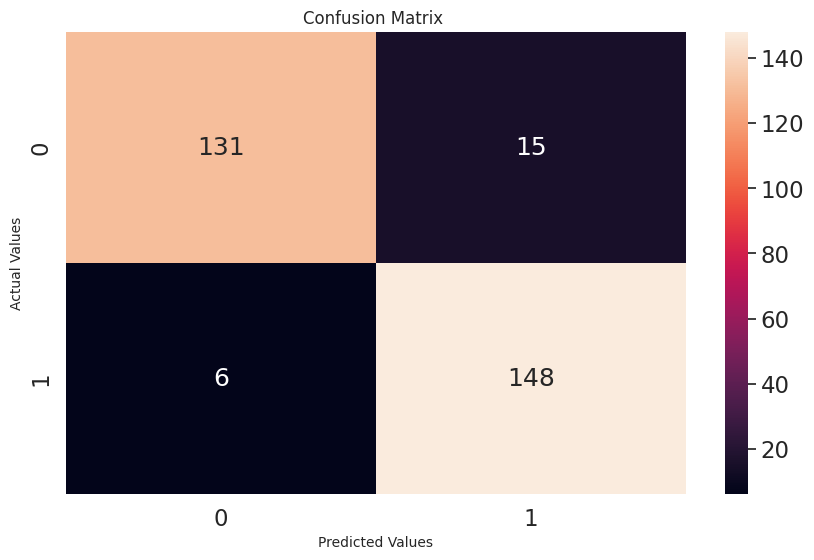

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
plt.title('Confusion Matrix ',fontsize=12)
ax.set_xlabel('Predicted Values',fontsize=10)
ax.set_ylabel('Actual Values',fontsize=10)
plt.show()

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1600
Best bootstrap: False
Best criterion: gini
Best max_depth: 6
Best min_samples_split: 82
Best min_samples_leaf: 55
Best max_features: auto
Best n_jobs: -1


Feature Importance

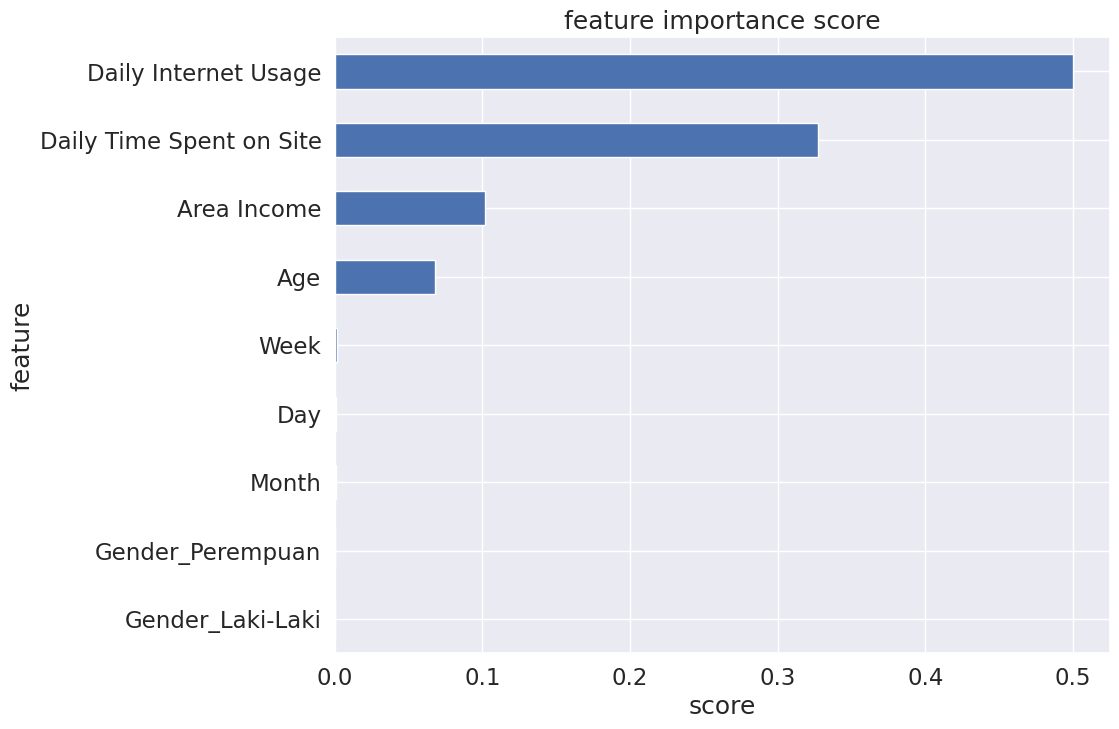

In [ ]:
show_feature_importance(xg_tuned)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.8 MB/s eta 0:00:00


In [ ]:
best_model = xg_tuned.best_estimator_

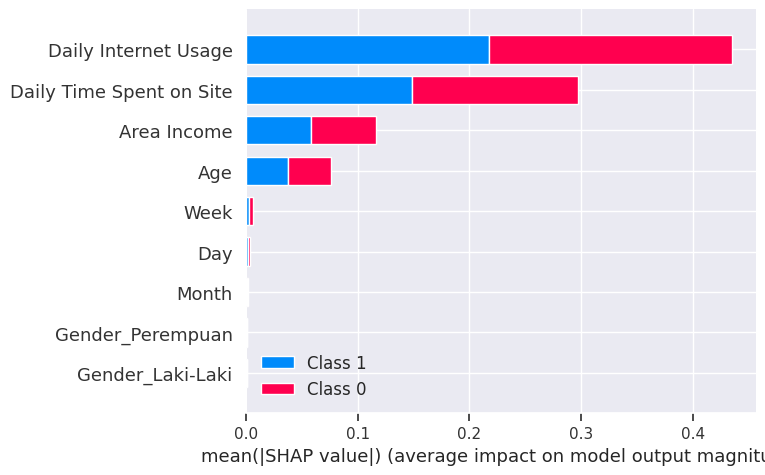

In [ ]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

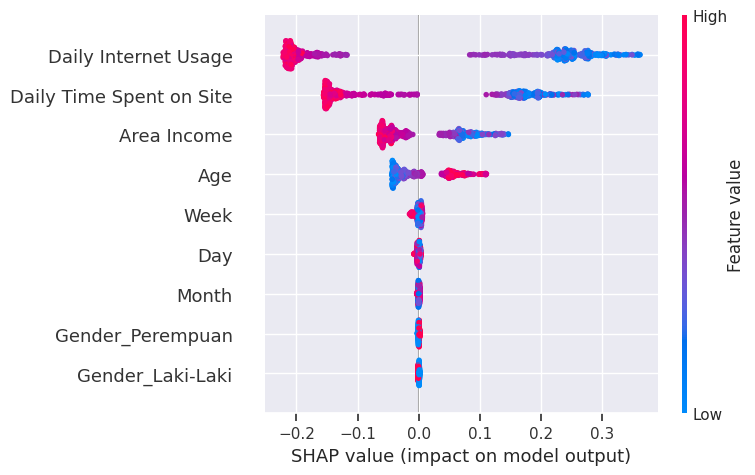

In [ ]:
f = plt.figure(figsize = (12,8))
shap.summary_plot(shap_values[1], X_train)